In [1]:
import sys
import numpy as np
import pandas as pd
import pyemma
np.bool = np.bool_
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
!python -V

Python 3.11.9


In [2]:
import warnings
def plot_sampled_function(xall, yall, zall, ax=None, nbins=100, nlevels=20, cmap=plt.cm.bwr, cbar=True, cbar_label=None):
    # histogram data
    xmin = np.min(xall)
    xmax = np.max(xall)
    dx = (xmax - xmin) / float(nbins)
    ymin = np.min(yall)
    ymax = np.max(yall)
    dy = (ymax - ymin) / float(nbins)
    # bin data
    eps = x
    xbins = np.linspace(xmin - 0.5*dx, xmax + 0.5*dx, num=nbins)
    ybins = np.linspace(ymin - 0.5*dy, ymax + 0.5*dy, num=nbins)
    xI = np.digitize(xall, xbins)
    yI = np.digitize(yall, ybins)
    # result
    z = np.zeros((nbins, nbins))
    N = np.zeros((nbins, nbins))
    # average over bins
    for t in range(len(xall)):
        z[xI[t], yI[t]] += zall[t]
        N[xI[t], yI[t]] += 1.0

    with warnings.catch_warnings() as cm:
        warnings.simplefilter('ignore')
        z /= N
    # do a contour plot
    extent = [xmin, xmax, ymin, ymax]
    if ax is None:
        ax = plt.gca()
    ax.contourf(z.T, 100, extent=extent, cmap=cmap)
    if cbar:
        cbar = plt.colorbar()
        if cbar_label is not None:
            cbar.ax.set_ylabel(cbar_label)

    return ax

In [3]:
def plot_sampled_density(xall, yall, zall, ax=None, nbins=100, cmap=plt.cm.Blues, cbar=True, cbar_label=None):
    return plot_sampled_function(xall, yall, zall, ax=ax, nbins=nbins, cmap=cmap, cbar=cbar, cbar_label=cbar_label)

In [4]:
#Ntrajs=1000
#trajs=[ pd.read_csv('cv_input_tica_symm/cv_input_tica_r%d.csv'%(i+1),index_col=1) for i in range(Ntrajs) ]
#trajs=pd.concat(trajs,keys=range(1,Ntrajs+1),names=['run','frame'])
trajs =pd.read_csv("h2b_300mM_ubq.csv",usecols=["Frame", "RUNID", "CV1", "CV2", "Rg1", "Rg2", "dist_entry", "dist_exit"])
trajs["combine"] = trajs.apply(lambda x: x["CV1"]/2 + x["CV2"]/2, axis=1)
trajs.set_index(["RUNID", "Frame"], inplace=True)
trajs


CV1       CV2        Rg1        Rg2   dist_exit  \
RUNID Frame                                                          
0.0   1.0     0.849741  0.861536  45.349793  45.313235   38.852778   
      2.0     0.862271  0.869963  46.376241  46.326426   50.593629   
      3.0     0.823349  0.879730  45.959952  45.948546   51.220081   
      4.0     0.881699  0.887597  44.988819  44.981121   38.951533   
      5.0     0.937015  0.935403  45.501926  45.533724   29.652950   
...                ...       ...        ...        ...         ...   
799.0 996.0   0.101059  0.123220  73.398573  73.330997  185.035567   
      997.0   0.110756  0.138828  71.445553  71.623832  178.279936   
      998.0   0.108200  0.144511  69.413933  69.763523  163.737525   
      999.0   0.104080  0.165028  69.239717  69.329360  170.719497   
      1000.0  0.110598  0.147926  69.661888  69.605105  167.963911   

              dist_entry   combine  
RUNID Frame                         
0.0   1.0      59.226310  0.855639  
      2.0      47.017684  0.866117  
      3.0      38.063316  0.851539  
      4.0      34.114344  0.884648  
      5.0      48.317512  0.936209  
...                  ...       ...  
799.0 996.0   193.284272  0.112140  
      997.0   181.208759  0.124792  
      998.0   173.321459  0.126356  
      999.0   178.152699  0.134554  
      1000.0  166.957438  0.129262  

[800000 rows x 7 columns]

In [5]:
ctrajs = [ trajs.loc[i,["CV1", "CV2", "Rg1", "Rg2", "combine", "dist_entry", "dist_exit"]].values for i in trajs.index.get_level_values(0).unique() ]
inp_tica=coor.source(ctrajs)
ctrajs[0].shape

(1000, 7)

In [6]:
#pip uninstall numpy
tica_obj = coor.tica(inp_tica, lag=10, var_cutoff=0.95, kinetic_map=True)
print (tica_obj)
tica_obj.dimension()

/Users/lokesh/miniconda3/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /Users/lokesh/miniconda3/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                            | 0/800 [00:00<?, ?it/s]

TICA(commute_map=False, dim=-1, epsilon=1e-06, kinetic_map=True, lag=10,
   ncov_max=inf, reversible=True, skip=0, stride=1, var_cutoff=0.95,
   weights=None)


5

In [7]:
Y = tica_obj.get_output() # get tica coordinates
#print('number of trajectories = ', np.shape(Y)[0])
#print('number of frames = ', np.shape(Y)[1])
#print('number of dimensions = ',np.shape(Y)[2])

getting output of TICA:   0%|                           | 0/800 [00:00<?, ?it/s]

In [8]:
def plot_labels(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.text(-2, -4.7, '1', fontsize=20, color='black')   
 
    ax.text(-1.2, -5, '2', fontsize=20, color='black')
    ax.text(-4.2, 1.5, '3', fontsize=20, color='black')
    ax.text(-0.1, 0, '4', fontsize=20, color='white')
    


(array([-6., -4., -2.,  0.,  2.,  4.,  6.]),
 [Text(0, -6.0, '−6'),
  Text(0, -4.0, '−4'),
  Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6')])

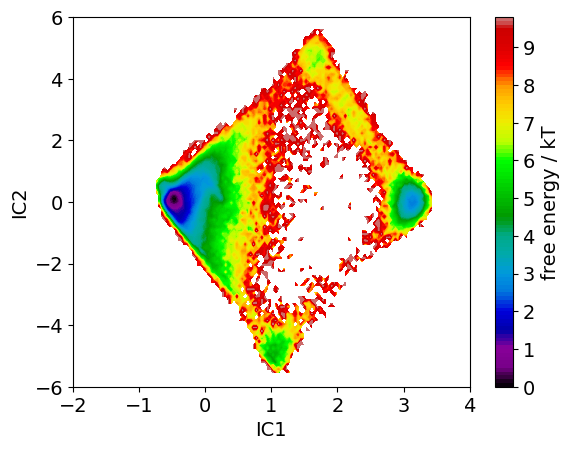

In [15]:
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1], vmin=0, vmax=10);
plt.ylim(-6.0, 6.0)
plt.xlim(-2.0, 4.0)
plt.xlabel("IC1")
plt.ylabel("IC2")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

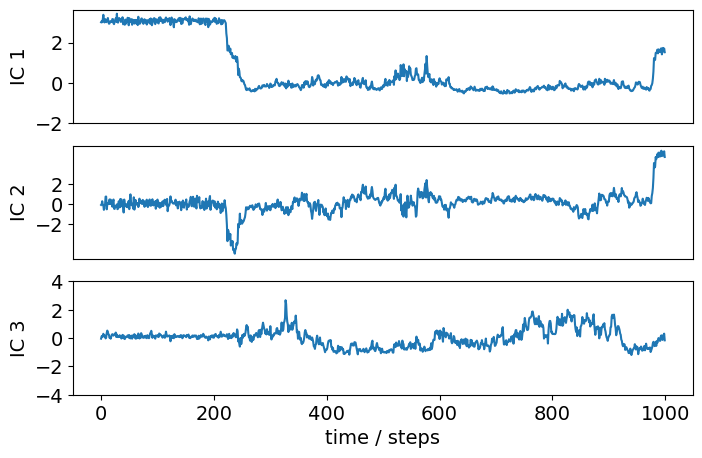

In [9]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
dt = 1
plt.figure(figsize=(8,5))
ax1=plt.subplot(311)
x = dt*np.arange(Y[0].shape[0])
plt.plot(x, Y[0][:,0]); plt.ylabel('IC 1'); plt.xticks([]); plt.yticks(np.arange(-2, 4, 2))
ax1=plt.subplot(312)
plt.plot(x, Y[0][:,1]); plt.ylabel('IC 2'); plt.xticks([]);  plt.yticks(np.arange(-2, 4, 2))
ax1=plt.subplot(313)
plt.plot(x, Y[0][:,2]); plt.xlabel('time / steps'); plt.ylabel('IC 3'); plt.yticks(np.arange(-4, 6, 2));

/Users/lokesh/miniconda3/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/lokesh/miniconda3/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


initialize kmeans++ centers:   0%|                      | 0/400 [00:00<?, ?it/s]

kmeans iterations:   0%|                                 | 0/50 [00:00<?, ?it/s]

15-12-24 16:05:07 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


/Users/lokesh/miniconda3/lib/python3.11/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence criterion"
/Users/lokesh/miniconda3/lib/python3.11/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


getting output of KmeansClustering:   0%|               | 0/800 [00:00<?, ?it/s]

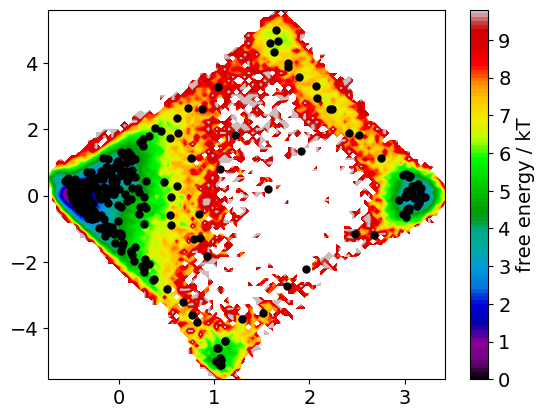

In [14]:
n_clusters =400
clustering = coor.cluster_kmeans(Y, k=n_clusters, max_iter=50)
dtrajs = clustering.dtrajs
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x = clustering.clustercenters[:,0]
cc_y = clustering.clustercenters[:,1]
plt.plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
#plt.xlim(-2.5, 2.8)
#plt.ylim(-2.5,2.8)
plt.savefig("TICA_canonical.pdf")

estimating BayesianMSM:   0%|                            | 0/12 [00:00<?, ?it/s]

<Axes: xlabel='lag time / steps', ylabel='timescale / steps'>

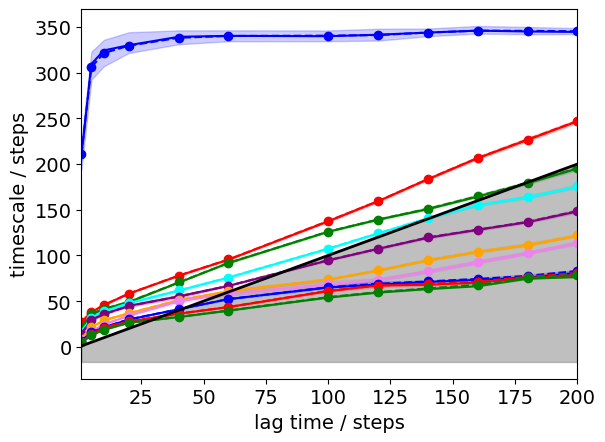

In [15]:
#its = msm.timescales_msm(dtrajs, lags=200, nits=10)
its= msm.timescales_msm(dtrajs,lags=[1,5,10,20,40,60,100,120,140,160,180,200],nits=10, errors="bayes")
mplt.plot_implied_timescales(its,ylog=False)

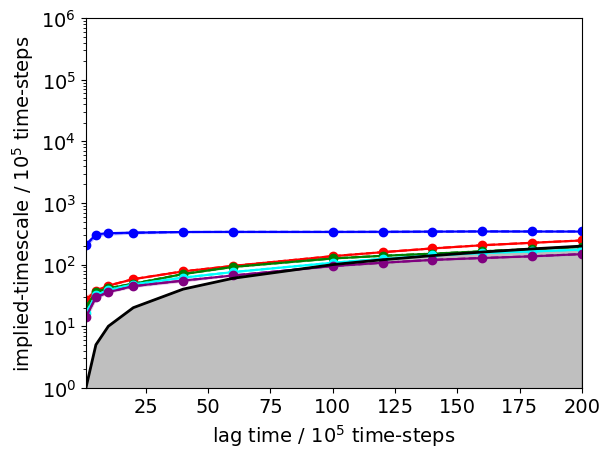

In [16]:
mplt.plot_implied_timescales(its,nits=5,ylog=True)
plt.ylim(1, 1e6) 
plt.xlabel(r'lag time / $10^5$ time-steps')
plt.ylabel(r'implied-timescale / $10^5$ time-steps')
plt.savefig('msm_its.pdf')

In [41]:
msm_lag = 20
M = msm.estimate_markov_model(dtrajs, msm_lag)
print('fraction of states used = ', M.active_state_fraction)
print('fraction of counts used = ', M.active_count_fraction)

fraction of states used =  1.0
fraction of counts used =  1.0


In [42]:
n_sets=11
M.pcca(n_sets)
cl_to_pccaset=np.argmax(M.metastable_memberships,axis=1)
len(M.active_set)
# test MSM
#M = msm.bayesian_markov_model(dtrajs, msm_lag)

400

In [43]:
hmm = M.coarse_grain(11)


12-11-24 11:09:25 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[18] WARNING  Requested coarse-grained model with 11 metastable states at lag=20. The ratio of relaxation timescales between 11 and 12 states is only 1.0882222462453097 while we recommend at least 1.5. It is possible that the resulting HMM is inaccurate. Handle with caution.


MaximumLikelihoodHMSM(accuracy=0.001, connectivity=None, dt_traj='1 step',
           lag=20, maxit=1000, mincount_connectivity=0.09090909090909091,
           msm_init=MaximumLikelihoodMSM(connectivity='largest', core_set=None,
           count_mode='sliding', dt_traj='1 step', lag=20, maxerr=1e-08,
           maxiter=1000000, milestoning_method='last_core',
           mincount_connectivity='1/n', reversible=True, score_k=10,
           score_method='VAMP2', sparse=False, statdist_constraint=None),
           nstates=11, observe_nonempty=True, reversible=True,
           separate=None, stationary=False, stride=1)
[2.66435061 2.66114848 2.26144571 6.68838389 1.18847398 1.02618894
 1.37446415 1.60773284 1.39586625 1.37572371 0.72328923]


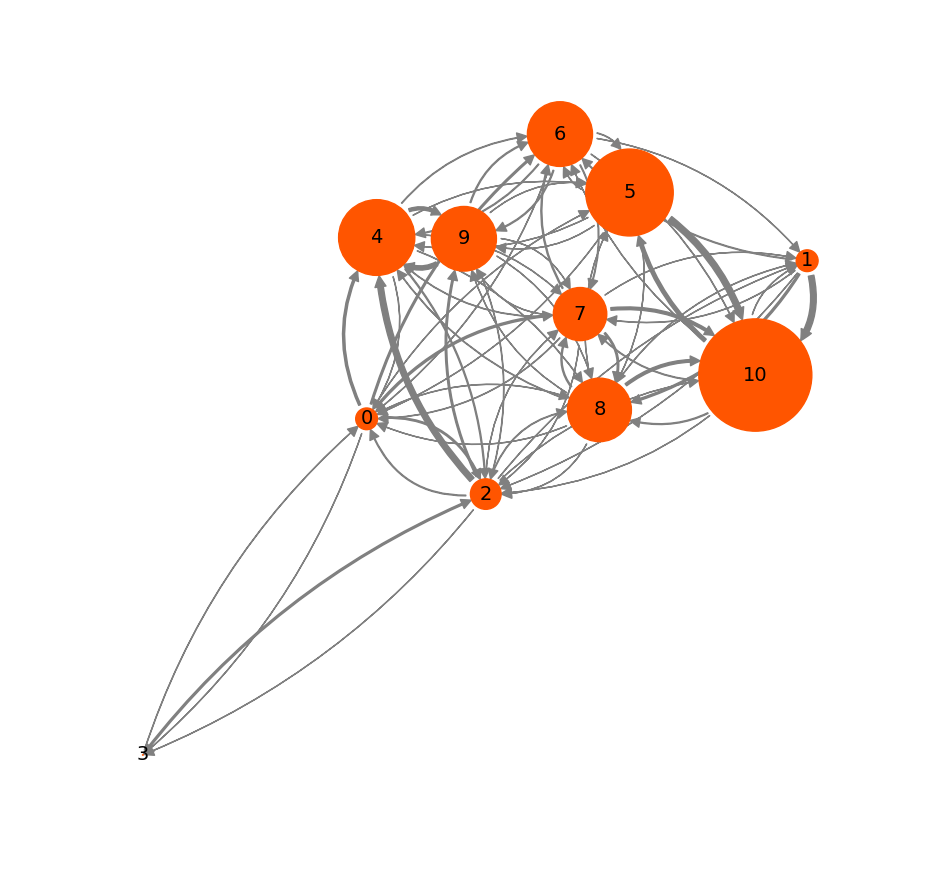

In [46]:
#print (hmm)
import pickle
file_hmm = open("hmm_800_new.obj", "wb")
pickle.dump(hmm, file_hmm)
import numpy as np
#print (type(hmm))

file_hmm1 = open("hmm_800_new.obj", "rb")
hmm1 = pickle.load(file_hmm1)
print (hmm1)
hmm_energies1 = -np.log(hmm1.stationary_distribution)
print (hmm_energies1*0.59)

#ck = M.cktest(4, mlags=11, err_est=False)


plt.rcParams.update({'font.size': 14})
mplt.plot_markov_model(hmm1,minflux=1.0e-11, arrow_labels=None)
plt.savefig("hmm_canonical_800_new.pdf")

In [49]:
# set the cluster
#trajs=trajs.set_index()
trajs=trajs.assign(pccaset=cl_to_pccaset[np.hstack(dtrajs)])
trajs=trajs.assign(cl=np.hstack(dtrajs))# set the cluster
# set the probability to be in the top pcca set
trajs=trajs.assign(pcca_prob=np.max(M.metastable_memberships[trajs.cl],axis=1))
#trajs

for i in range(n_sets):
    trajs.query('pccaset==%d'%i).sort_values(by='pcca_prob', ascending=False).pcca_prob.to_csv('pccast%d.csv'%i)


# Assign cluster labels and probabilities
#trajs = trajs.assign(
#    pccaset=cl_to_pccaset[np.hstack(dtrajs)],
#    cl=np.hstack(dtrajs),
#    pcca_prob=np.max(M.metastable_memberships[trajs.cl], axis=1)
#)

# Save probabilities by PCCA set
#for i in range(n_sets):
 #   (trajs.query('pccaset == @i')
 #         .sort_values(by='pcca_prob', ascending=False)
  #        .pcca_prob.to_csv(f'pccast{i}.csv'))

In [ ]:
state_labels=[r'H$_{R0}$',r'',r'N$_{u}$',r'H$_{L0}$',r'H$_{L}$',r'H$_{L2}$',r'T$_{L}$',r'T$_{R}$',r'H$_{L1}$',r'N',r'T']
rhcol='#8dd3c7'
lhcol='#80b1d3'
tcol='#ffffb3'
ncol='#fb8072'
state_colors=[rhcol,rhcol,rhcol,lhcol,rhcol,lhcol,tcol,tcol,lhcol,ncol,tcol]
#state_pos=np.array([[-0.5,1.4],[-1,0.7],[-1,1],[-0.5,-1.4],[-0.2,+0.8],[-1,-1],[-1.8,-0.5],[-1.8,0.5],[-0.2,-0.8],[0.5,0],[-1,0]])
plt.rcParams.update({'font.size': 7})
mplt.plot_markov_model(hmm, minflux=3.5e-7,state_labels=state_labels,state_colors=state_colors,max_width=5.1, arrow_labels=None)
plt.savefig('msm_hmm.pdf')